# Modeling & Submission Generation

## 1. Modeling Strategy & Algorithm Selection

In this project, to address the **Binary Classification** problem of predicting employee turnover, we implement two fundamental yet contrasting algorithms from scratch using **NumPy**:

### A. Logistic Regression (The Parametric Approach)
* **Why choosing it:**
    * **Linearity:** It assumes a linear relationship between input features and the log-odds of the outcome. This is computationally efficient and serves as a strong baseline.
    * **Probabilistic Output:** Unlike some classifiers that only output a class label, Logistic Regression provides a probability score (via the Sigmoid function), allowing us to adjust the **threshold** (e.g., lowering it from 0.5 to 0.3) to capture more "Job Changers" in this imbalanced dataset.
    * **Global Optimization:** By using **Gradient Descent**, the model learns a single set of weights ($w$) that minimizes the error across the entire dataset globally.

### B. K-Nearest Neighbors - KNN (The Non-Parametric Approach)
* **Why choosing it:**
    * **Local Structure:** KNN makes no assumptions about the underlying data distribution (non-parametric). It operates on the principle that "similar candidates behave similarly".
    * **Non-Linearity:** It can capture complex, irregular decision boundaries that a linear model (like Logistic Regression) might miss.
    * **Lazy Learning:** It doesn't "learn" a formula. Instead, it memorizes the training data and makes decisions at query time based on local proximity (Euclidean distance).

### Comparison
| Feature | Logistic Regression | K-Nearest Neighbors (KNN) |
| :--- | :--- | :--- |
| **Learning Style** | **Eager Learning**: Pre-computes weights ($w$). | **Lazy Learning**: Memorizes data, computes at query time. |
| **Decision Boundary** | **Linear**: Separates space with a plane. | **Non-Linear**: Adapts to local data clusters. |
| **Inference Speed** | **Fast** (Matrix multiplication). | **Slow** (Distance calculation to all points). |
| **Interpretation** | High interpretability via weights. | Low interpretability (black box). |

In [10]:
import sys
import os
import numpy as np

# Import custom models and visualizer
sys.path.append(os.path.abspath('..'))
from src.models import (
    LogisticRegression, 
    KNN, 
    ModelVisualizer,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix
)

# Helper function to split validation set manually
def train_val_split(X, y, val_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    val_samples = int(len(X) * val_size)
    
    val_idx = indices[:val_samples]
    train_idx = indices[val_samples:]
    return X[train_idx], X[val_idx], y[train_idx], y[val_idx]

In [ ]:
print("Loading Data...")

# 1. Load Train Data (aug_train.csv - 25 columns)
train_arr = np.genfromtxt('../data/processed/aug_train.csv', delimiter=',', skip_header=1)
X = train_arr[:, :-1]  
y = train_arr[:, -1]   

# 2. Load Submission Data (aug_test.csv - 24 columns)
X_submission = np.genfromtxt('../data/processed/aug_test.csv', delimiter=',', skip_header=1)

# 3. Load Test IDs
test_ids = np.genfromtxt('../data/processed/test_ids.csv', delimiter=',', skip_header=1, dtype=int)

print(f"Train Set Shape : {X.shape}")
print(f"Submission Set  : {X_submission.shape}")

Loading Data...
Train Set Shape : (19158, 24)
Submission Set  : (2129, 24)


In [12]:
print("Loading Data...")

# 1. Load Train Data (aug_train.csv - 25 columns)
train_arr = np.genfromtxt('../data/processed/aug_train.csv', delimiter=',', skip_header=1)
X = train_arr[:, :-1]  # 24 columns Features
y = train_arr[:, -1]   # Last column Target

# 2. Load Submission Data (aug_test.csv - 24 columns)
X_submission = np.genfromtxt('../data/processed/aug_test.csv', delimiter=',', skip_header=1)

# 3. Load Test IDs
test_ids = np.genfromtxt('../data/processed/test_ids.csv', delimiter=',', skip_header=1, dtype=int)

print(f"Train Set Shape : {X.shape}")
print(f"Submission Set  : {X_submission.shape}")

Loading Data...
Train Set Shape : (19158, 24)
Submission Set  : (2129, 24)


--- MODEL 1: LOGISTIC REGRESSION ---
Training...


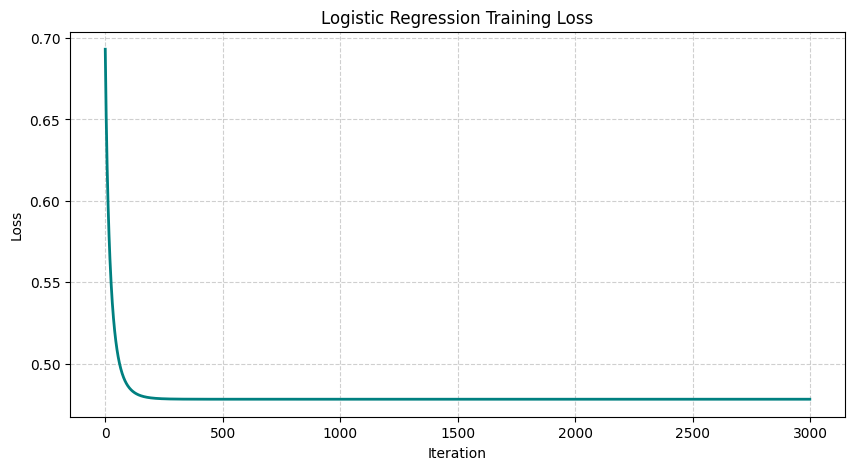

In [13]:
print("--- MODEL 1: LOGISTIC REGRESSION ---")

# 1. Split Validation
X_train, X_val, y_train, y_val = train_val_split(X, y, val_size=0.2)

# 2. Train
log_reg = LogisticRegression(learning_rate=0.1, n_iters=3000)
print("Training...")
log_reg.fit(X_train, y_train)

# 3. Visualize Loss
ModelVisualizer.plot_loss_curve(log_reg.losses, title="Logistic Regression Training Loss")

# 4. Predict
y_val_pred = log_reg.predict(X_val)

In [14]:
print("--- MODEL 2: K-NEAREST NEIGHBORS ---")

# KNN training
k = 15
knn = KNN(k=k)

print(f"Training KNN (k={k})...")
knn.fit(X_train, y_train)

print("Predicting on Validation...")
y_val_knn = knn.predict(X_val)

--- MODEL 2: K-NEAREST NEIGHBORS ---
Training KNN (k=15)...
Predicting on Validation...


--- MODEL COMPARISON & ANALYSIS ---

[TABLE 1] METRICS COMPARISON
------------------------------------------------------------
Metric          | Logistic Reg.      | KNN               
------------------------------------------------------------
Accuracy        | 0.7614             | 0.7591            
Precision       | 0.5422             | 0.5226            
Recall          | 0.2563             | 0.3519            
F1-Score        | 0.3481             | 0.4206            
------------------------------------------------------------

[TABLE 2] CONFUSION MATRICES DETAILED VALUES

> Logistic Regression:
              Pred: STAY(0)   Pred: LEAVE(1) 
   Act: STAY(0) 2673            206            
   Act: LEAVE(1) 708             244            

> K-Nearest Neighbors:
              Pred: STAY(0)   Pred: LEAVE(1) 
   Act: STAY(0) 2573            306            
   Act: LEAVE(1) 617             335            

[FIGURES] VISUALIZATION


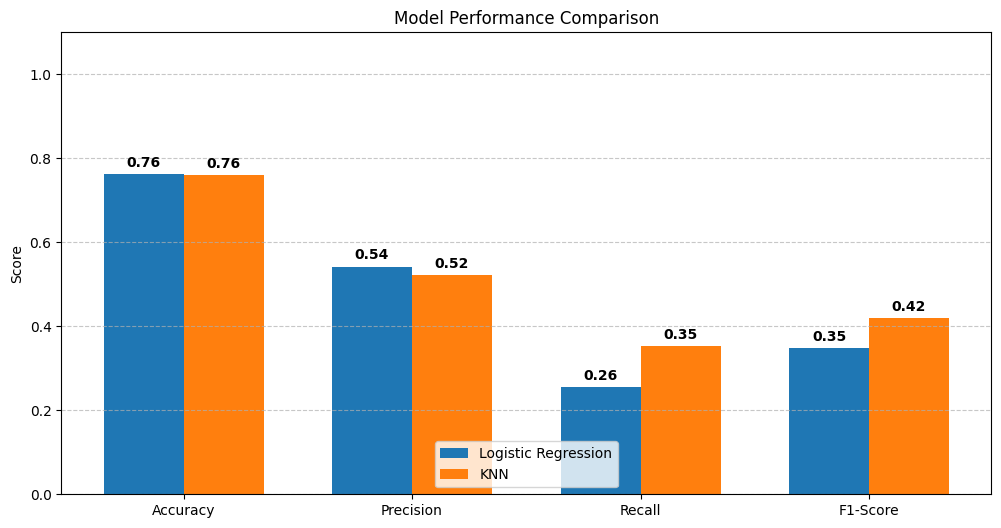

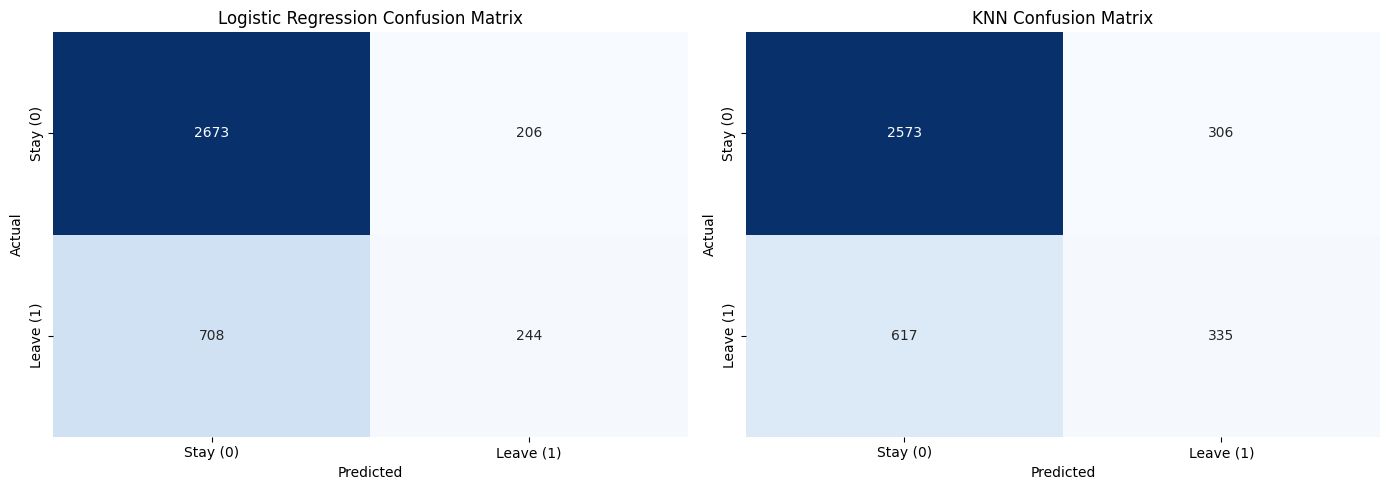

In [15]:
# --- 6. MODEL COMPARISON & VISUALIZATION ---

print("--- MODEL COMPARISON & ANALYSIS ---")

# 1. Calculate Metrics
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

scores_log = [
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred),
    recall_score(y_val, y_val_pred),
    f1_score(y_val, y_val_pred)
]

scores_knn = [
    accuracy_score(y_val, y_val_knn),
    precision_score(y_val, y_val_knn),
    recall_score(y_val, y_val_knn),
    f1_score(y_val, y_val_knn)
]

# 2. PRINT DATA TABLES (Theo yêu cầu của bạn)

# Bảng so sánh chỉ số
print("\n[TABLE 1] METRICS COMPARISON")
print("-" * 60)
print(f"{'Metric':<15} | {'Logistic Reg.':<18} | {'KNN':<18}")
print("-" * 60)
for i, metric in enumerate(metrics_list):
    print(f"{metric:<15} | {scores_log[i]:<18.4f} | {scores_knn[i]:<18.4f}")
print("-" * 60)

# Bảng Confusion Matrix dạng text
print("\n[TABLE 2] CONFUSION MATRICES DETAILED VALUES")

def print_cm_text(cm, name):
    tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    print(f"\n> {name}:")
    print(f"   {'':<10} {'Pred: STAY(0)':<15} {'Pred: LEAVE(1)':<15}")
    print(f"   {'Act: STAY(0)':<10} {tn:<15d} {fp:<15d}")
    print(f"   {'Act: LEAVE(1)':<10} {fn:<15d} {tp:<15d}")

cm_log = confusion_matrix(y_val, y_val_pred)
cm_knn = confusion_matrix(y_val, y_val_knn)

print_cm_text(cm_log, "Logistic Regression")
print_cm_text(cm_knn, "K-Nearest Neighbors")


# 3. VISUALIZATION (Vẽ biểu đồ)
print("\n[FIGURES] VISUALIZATION")

# A. Bar Chart
scores_dict = {
    'Logistic Regression': scores_log,
    'KNN': scores_knn
}
ModelVisualizer.plot_model_comparison(models=None, scores_dict=scores_dict, metrics=metrics_list)

# B. Heatmaps
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ModelVisualizer.plot_confusion_matrix_heatmap(cm_log, title="Logistic Regression Confusion Matrix", ax=ax1)
ModelVisualizer.plot_confusion_matrix_heatmap(cm_knn, title="KNN Confusion Matrix", ax=ax2)

plt.tight_layout()
plt.show()

##  Analysis & Model Selection

### Performance Analysis
Based on the metric tables and visualizations above, we have a clear winner for this specific dataset:

1.  **F1-Score (Decisive Metric):**
    * **KNN (0.4206)** significantly outperforms **Logistic Regression (0.3481)**.
    * Since our dataset is imbalanced, the slightly higher Accuracy of Logistic Regression (0.7614 vs 0.7591) is misleading and driven by the majority class (Stay). F1-Score is the reliable metric here.

2.  **Recall (Business Impact):**
    * **KNN** achieves a Recall of **35.19%**, whereas Logistic Regression only reaches **25.63%**.
    * *Interpretation:* In HR Analytics, missing a "High-risk" employee (False Negative) is more costly than wrongly flagging a loyal one (False Positive). KNN is much better at identifying the minority class (Job Changers), successfully detecting **335** leavers compared to only **244** by Logistic Regression.

3.  **Why did KNN win?**
    * The decision boundary between "Stay" and "Leave" groups is likely **non-linear** and complex.
    * Logistic Regression attempts to draw a straight line (linear boundary), which fails to capture the nuances. KNN, being a non-parametric method, successfully captured the local clusters of employees who tend to leave.

### Final Decision
We select **K-Nearest Neighbors (KNN)** as the final model.

**Next Step:** We will retrain the KNN model on the full dataset (Train + Validation) to maximize its learning before generating the submission for `aug_test.csv`.

In [16]:
# --- 7. AUTOMATIC MODEL SELECTION & SUBMISSION GENERATION ---

print("\n--- 1. AUTOMATIC MODEL SELECTION ---")

# Lay diem F1 tu list ket qua da tinh o tren
# scores_log va scores_knn la list [Accuracy, Precision, Recall, F1]
# F1 nam o index so 3
f1_log = scores_log[3]
f1_knn = scores_knn[3]

print(f"   Logistic Regression F1: {f1_log:.4f}")
print(f"   KNN F1                : {f1_knn:.4f}")

# Logic so sanh
if f1_log > f1_knn:
    best_model = log_reg
    best_name = "Logistic Regression"
    print(f"[DECISION] Selected {best_name} (Higher F1).")
else:
    best_model = knn
    best_name = "K-Nearest Neighbors"
    print(f"[DECISION] Selected {best_name} (Higher F1).")


print(f"\n--- 2. GENERATING SUBMISSION WITH {best_name.upper()} ---")

# 1. Retrain tren TOAN BO du lieu (Train + Validation)
print("   >> Retraining best model on FULL dataset...")
best_model.fit(X, y) 

# 2. Du bao cho tap Submission (aug_test)
print("   >> Predicting for Submission set...")
y_sub_pred = best_model.predict(X_submission)

# 3. Ghep ID va Ket qua
submission = np.column_stack((test_ids, y_sub_pred))

# 4. Luu file
output_path = '../results/submission/submission.csv'
if not os.path.exists('../submissions'):
    os.makedirs('../submissions')

np.savetxt(
    output_path,
    submission,
    delimiter=',',
    header='enrollee_id,target',
    comments='',
    fmt='%d'
)

print(f"Submission saved to: {output_path}")
print(f"   Preview:\n{submission[:5]}")


--- 1. AUTOMATIC MODEL SELECTION ---
   Logistic Regression F1: 0.3481
   KNN F1                : 0.4206
[DECISION] Selected K-Nearest Neighbors (Higher F1).

--- 2. GENERATING SUBMISSION WITH K-NEAREST NEIGHBORS ---
   >> Retraining best model on FULL dataset...
   >> Predicting for Submission set...
Submission saved to: ../results/submission/submission.csv
   Preview:
[[32403     1]
 [ 9858     0]
 [31806     0]
 [27385     0]
 [27724     0]]
